In [1]:
# Import required libraries
import scipy.io as sio
import numpy as np
import datetime
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import math as m
import gsw
import matplotlib as mpl
import cmcrameri as ccm
from scipy.interpolate import interp1d, interp2d, griddata
import scipy.signal as signal
from IPython.display import display, HTML
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import cmocean as cmo
import warnings
from pytides2.tide import Tide


# autoreload
%load_ext autoreload
%autoreload 2

# Ignore warnings
warnings.filterwarnings("ignore")

# Set the path for the src directory for importing custom modules
import sys
import os
# check the path of the current directory
print(os.getcwd())
sys.path.append(os.path.abspath(os.path.join('..','..', 'src')))

# Import custom modules
from paths import *
from functions import *


/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/Vries_2025_Hydrography_Circulation_NK/notebooks/explore


In [2]:
# ADCP mooringas at GF10 300 and 75 kHz
f75 = datapath /  'raw' / 'ADCP75.mat'
f300 = datapath / 'raw' / 'ADCP300.mat'

In [3]:
# ADCP mooringas at GF10 300 and 75 kHz
f75 = str( datapath /  'raw' / 'ADCP75.mat')
f300 = str(datapath / 'raw' / 'ADCP300.mat')

In [4]:
from velocity_preprocessing_functions import *

ds_velo_300, _, df_cons300, my_tide_along, _, _, _, _, _, ds_velo_no_outlier_removal_300 = open_and_proces_mat_adcp(f300)
ds_velo_75, _, df_cons75, _, _, _, _, _, _, ds_velo_no_outlier_removal_75 = open_and_proces_mat_adcp(f75)


In [5]:
ds_velo_no_outlier_removal_300

<xarray.Dataset>
Dimensions:         (time: 18188, z: 24)
Coordinates:
  * time            (time) datetime64[ns] 2018-05-29T14:26:00 ... 2019-06-12T...
  * z               (z) float64 50.79 48.79 46.79 44.79 ... 10.79 8.79 6.79 4.79
Data variables:
    SerEmmpersec    (time, z) float64 -18.0 -68.0 -83.0 ... -166.0 -170.0 -97.0
    SerNmmpersec    (time, z) float64 27.0 -34.0 -53.0 ... -37.0 -39.0 -27.0
    SerVmmpersec    (time, z) float64 -26.0 4.0 -3.0 0.0 ... 6.0 4.0 2.0 0.0
    SerErmmpersec   (time, z) float64 -5.0 -5.0 0.0 4.0 ... 25.0 12.0 23.0 24.0
    SerMagmmpersec  (time, z) float64 32.0 76.0 98.0 115.0 ... 170.0 174.0 101.0
    SerDir10thDeg   (time, z) float64 3.263e+03 2.434e+03 ... 2.544e+03
    SerPG4          (time, z) float64 100.0 100.0 100.0 ... 100.0 100.0 100.0
    flag            (time, z) int64 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
Attributes:
    bin_size:                        2
    number_of_bins:                  36
    number_of_samples:               18535
    mounting_depth:                  55
    sampling_interval:               29.98 minutes
    first_ping:                      2018-05-27 11:56:00
    last_ping:                       2019-06-17 14:55:59
    number_of_observations_per_day:  48.0

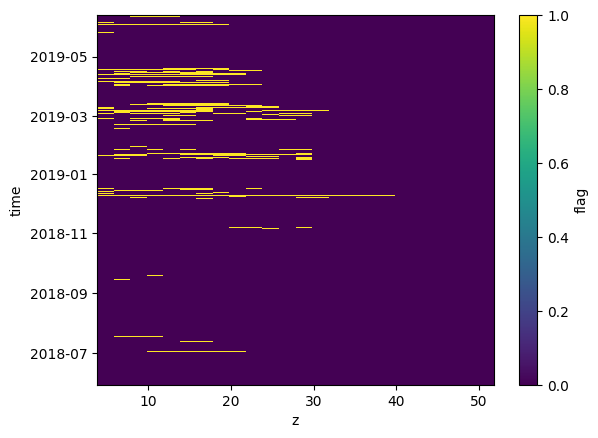

In [ ]:
ds_velo_no_outlier_removal_300.flag.plot()

# add atributes dictionary
ds_velo_no_outlier_removal_300.attrs = {'instrument': 'ADCP', 'location': 'GF10', 'depth': '300m', 'units': 'mm/s', 'time_zone': 'UTC'}

In [6]:
xr.open_dataset("/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/project-data-conversion/data/processed/ADCP75_20180529_20190612_64.61_-50.95.nc")

<xarray.Dataset>
Dimensions:           (time: 9093, z: 30)
Coordinates:
  * time              (time) datetime64[ns] 2018-05-29T15:00:00 ... 2019-06-1...
  * z                 (z) float64 507.3 491.3 475.3 459.3 ... 75.26 59.26 43.26
Data variables: (12/33)
    SerEmpersec       (time, z) float64 ...
    SerNmpersec       (time, z) float64 ...
    SerVmpersec       (time, z) float64 ...
    SerErmpersec      (time, z) float64 ...
    SerMagmpersec     (time, z) float64 ...
    SerDir10thDeg     (time, z) float64 ...
    ...                ...
    AnBatt            (time, z) float64 ...
    flag              (time, z) int64 ...
    Alongmpersec      (time, z) float64 ...
    Acrossmpersec     (time, z) float64 ...
    AlongResmpersec   (time, z) float64 ...
    AcrossResmpersec  (time, z) float64 ...
Attributes: (12/44)
    units:                    mm/s
    RDISystem:                Broadband 76.8 kHz
    RDIPingsPerEns:           40
    RDISecPerPing:            5.0
    RDIEnsDate:               18/05/27
    RDIEnsTime:               13:00:00.00
    ...                       ...
    time_coverage_start:      2018-05-29T15:00:00.000000000
    time_coverage_end:        2019-06-12T10:59:59.000000000
    title:                    ADCP timeseries at Station GF10 on between 2018...
    summary:                  The file contains velocity measurements every 6...
    flag:                     0 = good data, 1 = bad data
    interval:                 60 minutes minutes